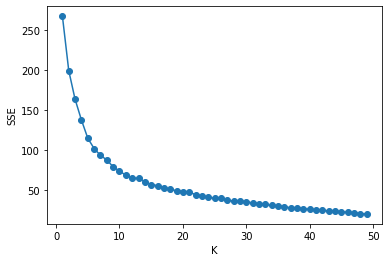

In [1]:
#####C项目：汽车产品聚类分析 工号：15785 姓名：彭宇 #####
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np
data = pd.read_csv('CarPrice_Assignment.csv')#载入数据
train_x = data.drop(['car_ID','CarName'],axis=1)#去除无用数据列，提取所需数据列，创建训练数据集
# 使用LabelEncoder将多个字段中的文本类型特征转化为数字
from sklearn.preprocessing import LabelEncoder
cols = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']#待转化字段
le = LabelEncoder()
for col in cols:
    train_x[col] = le.fit_transform(train_x[col])
# 将数据规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).to_csv('temp.csv', index=False)
# 使用K-Means 手肘法：统计不同K取值的误差平方和，选取合适的K值
import matplotlib.pyplot as plt
sse = []
for k in range(1, 50):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 50)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

In [2]:
#由手肘法绘图可取K=10，使用KMeans聚类
kmeans = KMeans(n_clusters=10)#尝试将数据分为10类
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)#打印聚类结果
result.to_csv('CarPrice_Assignment_cluster_result.csv',index=False)# 将聚类结果导出到CSV文件中

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [3]:
#找出所有VW车型对应的竞品车型
#所有VW车型名称
VW=['vokswagen rabbit','volkswagen 1131 deluxe sedan','volkswagen model 111','volkswagen type 3','volkswagen 411 (sw)','volkswagen super beetle','volkswagen dasher','vw dasher','vw rabbit','volkswagen rabbit','volkswagen rabbit custom']
#提取与VW车型相同聚类的所有车型
for vw in VW:
	Group_num = result[result['CarName'].isin([vw])]['聚类结果'].tolist()#提取VW车型对应的聚类结果编号
	Rivals = result.loc[result['聚类结果']==int(Group_num[0])]['CarName']#提取与VW车型相同聚类结果的车型竞品名称
	Rival_list=[]
	for r in Rivals:
		if r != vw:#去除竞品车型列表中与自身车型重复的名称
			Rival_list.append(r)
	Rival_car = list(set(Rival_list))#去除竞品车列表中的重复车型名称
	Rival_car.sort()#竞品车型名称按字母顺序排序
	Rival_string = ', '.join(Rival_car)#以逗号分隔竞品车型名称列表并转化为字符串
	print(str(vw)+' 的竞品车型有：'+Rival_string+'\n\n')#打印各VW车型对应竞品车型名称

vokswagen rabbit 的竞品车型有：mazda glc deluxe, mazda rx-7 gs, nissan gt-r, toyota corolla, toyota corona, volkswagen model 111


volkswagen 1131 deluxe sedan 的竞品车型有：Nissan versa, chevrolet impala, chevrolet monte carlo, dodge challenger se, dodge rampage, honda accord, honda accord cvcc, honda civic, honda civic (auto), honda civic 1300, honda civic cvcc, isuzu D-Max , maxda glc deluxe, maxda rx3, mazda 626, mazda glc custom, mazda rx2 coupe, mitsubishi g4, mitsubishi lancer, mitsubishi mirage, mitsubishi outlander, nissan clipper, nissan juke, nissan leaf, nissan rogue, plymouth fury iii, subaru, subaru dl, toyota corolla liftback, toyota corona, toyota corona mark ii


volkswagen model 111 的竞品车型有：mazda glc deluxe, mazda rx-7 gs, nissan gt-r, toyota corolla, toyota corona, vokswagen rabbit


volkswagen type 3 的竞品车型有：audi 100 ls, audi 100ls, audi 5000, bmw 320i, honda civic, mitsubishi mirage g4, nissan dayz, nissan fuga, nissan otti, renault 12tl, saab 99gle, saab 99le, subaru baja, subaru